In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

%matplotlib inline

In [8]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [9]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

first column is the label 
other 784 columns are pixel values

In [23]:
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

In [24]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [25]:
X_train.shape

(60000, 784)

In [26]:
28 * 28 

784

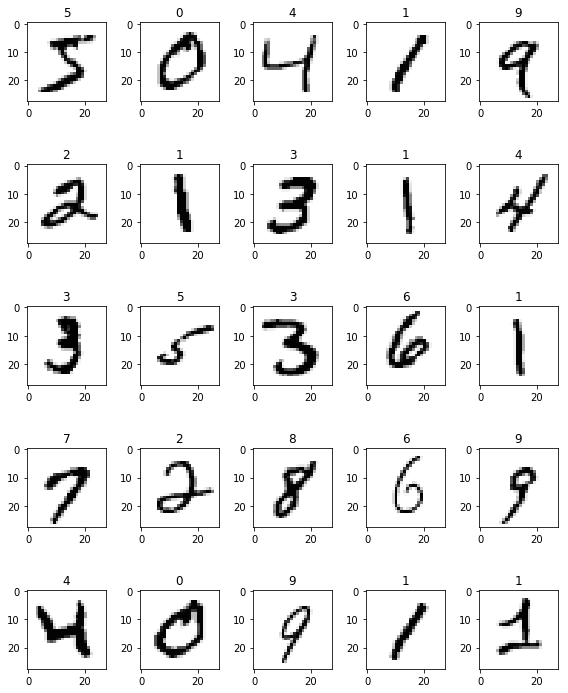

In [27]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="Greys")
    ax.set_title(y_train[i])
    
plt.tight_layout()

(-0.5, 783.5, 0.0, 0.5746324705882354)

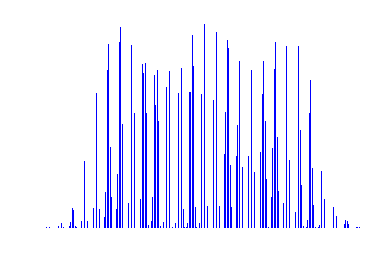

In [30]:
pd.Series(X_train.mean(axis=0)).plot.bar(color = "blue")
plt.axis("off")

In [32]:
(pd.DataFrame({"digit": y_train, 
              "mean": X_train.mean(axis = 1)})
.groupby("digit")["mean"].mean())

digit
0    0.173399
1    0.075999
2    0.148975
3    0.141530
4    0.121366
5    0.128749
6    0.137302
7    0.114528
8    0.150156
9    0.122590
Name: mean, dtype: float64

In [36]:
%%time
est = linear_model.SGDClassifier(learning_rate="invscaling"
                                 , eta0=0.01
                                 , random_state=1
                                 , max_iter=1000
                                 , tol=1e-4)
est.fit(X_train, y_train)
est.score(X_test, y_test)

CPU times: user 48.6 s, sys: 455 ms, total: 49.1 s
Wall time: 49.9 s
